In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

     |████████████████████████████████| 7.2 MB 3.4 MB/s eta 0:00:01
     |████████████████████████████████| 28.7 MB 335 kB/s  eta 0:00:01     |████████████████                | 14.3 MB 19.4 MB/s eta 0:00:01
     |████████████████████████████████| 301 kB 29.6 MB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1315 sha256=be951bb51701cd47fcca8e38b6c2f6ee179113bfd7060749a05306caa8b07dea
  Stored in directory: /Users/samchari/Library/Caches/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [1]:
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [2]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

In [3]:
# Set features. This will also be used as your x values.
#selected_features = df[['names', 'of', 'selected', 'features', 'here']]

selected_features = df[["koi_impact","koi_time0bk","koi_period","koi_slogg","koi_depth","koi_prad","koi_insol","koi_model_snr","koi_tce_plnt_num","koi_steff"]]

# Create a Train Test Split

Use `koi_disposition` for the y values

In [4]:
y = df["koi_disposition"]


In [6]:
from sklearn.model_selection import train_test_split

X2_train, X2_test, y2_train, y2_test = train_test_split(selected_features, y, random_state=23)
X2_train.head()

,koi_impact,koi_time0bk,koi_period,koi_slogg,koi_depth,koi_prad,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff
243,0.503,132.638660,5.714624,4.365,297.8,1.78,210.16,16.7,3,5344
5885,0.167,143.504361,27.308150,4.574,388000.0,47.06,17.75,820.9,1,5541
3093,0.015,183.024800,91.957230,4.114,308.4,2.66,14.41,12.3,1,5854
2176,0.561,185.153300,31.517795,4.144,357.6,2.72,45.68,63.2,1,5611
974,0.971,151.443520,32.773763,4.076,564.5,5.00,52.22,21.7,1,5640


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [7]:
# Scale your data
from sklearn.preprocessing import StandardScaler
X2_scaler = StandardScaler().fit(X2_train)

X2_train_scaled = X2_scaler.transform(X2_train)
X2_test_scaled = X2_scaler.transform(X2_test)

print(selected_features.shape,y.shape)

(6991, 10) (6991,)


# Train the Model



In [8]:
# Create the SVC Model
from sklearn.svm import SVC 
model2 = SVC(kernel='linear')
model2.fit(X2_train_scaled,y2_train)

print(f"Training Data Score: {model2.score(X2_train_scaled, y2_train)}")
print(f"Testing Data Score: {model2.score(X2_test_scaled, y2_test)}")

Training Data Score: 0.5847797062750334
Testing Data Score: 0.5812356979405034


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [9]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid2 = GridSearchCV(model2, param_grid, verbose=3)

In [10]:
# Train the model with GridSearch
grid2.fit(X2_train_scaled,y2_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................... C=1, gamma=0.0001, score=0.604, total=   0.9s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.578, total=   0.7s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.574, total=   0.7s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.594, total=   0.8s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.579, total=   1.0s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.604, total=   1.0s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.578, total=   1.5s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.574, total=   0.8s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.594, total=   0.8s
[CV] C=1, gamma=0.0005 ...............................................
[CV] .

[CV] .................. C=50, gamma=0.0001, score=0.629, total=   6.7s
[CV] C=50, gamma=0.0001 ..............................................
[CV] .................. C=50, gamma=0.0001, score=0.609, total=   3.6s
[CV] C=50, gamma=0.0001 ..............................................
[CV] .................. C=50, gamma=0.0001, score=0.608, total=   3.5s
[CV] C=50, gamma=0.0001 ..............................................
[CV] .................. C=50, gamma=0.0001, score=0.627, total=   8.7s
[CV] C=50, gamma=0.0001 ..............................................
[CV] .................. C=50, gamma=0.0001, score=0.611, total=   4.4s
[CV] C=50, gamma=0.0005 ..............................................
[CV] .................. C=50, gamma=0.0005, score=0.629, total=   5.7s
[CV] C=50, gamma=0.0005 ..............................................
[CV] .................. C=50, gamma=0.0005, score=0.609, total=   3.6s
[CV] C=50, gamma=0.0005 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  3.3min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [11]:
print(grid2.best_params_)
print(grid2.best_score_)

{'C': 50, 'gamma': 0.0001}
0.6168231831115056


In [12]:
# Make predictions with the hypertuned model
predictions = grid2.predict(X2_test_scaled)

In [13]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y2_test, predictions,
                            target_names=["CANDIDATE","FALSE POSITIVE","CONFIRMED"]))

                precision    recall  f1-score   support

     CANDIDATE       0.47      0.12      0.19       437
FALSE POSITIVE       0.51      0.73      0.60       450
     CONFIRMED       0.71      0.83      0.76       861

      accuracy                           0.62      1748
     macro avg       0.57      0.56      0.52      1748
  weighted avg       0.60      0.62      0.58      1748



k: 1, Train/Test Score: 1.000/0.570
k: 3, Train/Test Score: 0.771/0.594
k: 5, Train/Test Score: 0.729/0.601
k: 7, Train/Test Score: 0.707/0.595
k: 9, Train/Test Score: 0.694/0.604
k: 11, Train/Test Score: 0.683/0.604
k: 13, Train/Test Score: 0.680/0.605
k: 15, Train/Test Score: 0.669/0.612
k: 17, Train/Test Score: 0.666/0.614
k: 19, Train/Test Score: 0.665/0.612
k: 21, Train/Test Score: 0.665/0.606
k: 23, Train/Test Score: 0.659/0.610
k: 25, Train/Test Score: 0.655/0.610
k: 27, Train/Test Score: 0.649/0.621
k: 29, Train/Test Score: 0.650/0.614


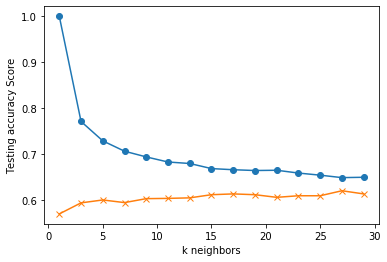

In [14]:
# next try KNN classifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

train_scores = []
test_scores = []
for k in range(1, 30, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X2_train_scaled, y2_train)
    train_score = knn.score(X2_train_scaled, y2_train)
    test_score = knn.score(X2_test_scaled, y2_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 30, 2), train_scores, marker='o')
plt.plot(range(1, 30, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

# Save the Model

In [17]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X2_train, y2_train)
print('k=17 Test Acc: %.3f' % knn.score(X2_test, y2_test))

k=17 Test Acc: 0.626


In [18]:
knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(X2_train, y2_train)
print('k=23 Test Acc: %.3f' % knn.score(X2_test, y2_test))

k=23 Test Acc: 0.628


In [19]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'usha2.sav'
joblib.dump(model2, filename)

['usha2.sav']